Your goal of this task is to implement a Support Vector Machine (SVM) Classifier



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [3]:
import pandas as pd
import numpy as np
import tools as t # set of tools for plotting, data splitting, etc..

###Support Vector Machines
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{-1, +1\})$.
Your goal in this assignment is to implement SVM classifier. Recall that a SVM uses the hypothesis $\begin{equation} h_\theta(x) = x^T\theta. \end{equation}$ with the classification rule $sign(h_\theta(x))$. 

In SVM we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):

 $$\begin{equation} J_\theta = \frac{1}{2*m}\sum_{i=1}^m  max(0,1-y^{(i)} x^{(i) T}\theta)\end{equation}$$
 
 
Here $m$ is the number of training exmaples.


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.

Recall the partial derivative of the cost function wrt $\theta_j$ for a single example =

$$
\frac{\partial J}{\partial \theta_j}=\begin{cases}-y\cdot x_j & \text{if $y\cdot x^T \theta <1$}, \\ 0 &
\text{otherwise}.\end{cases}
$$



In [4]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxiter=20000, alpha=0.01, plotcf=True):
    
    # Remember you must plot the cost function after set of iterations to
    # check whether your gradient descent code is working fine or not...
    eps=0.00001
    #np.random.seed(seed=99)
    #print X.shape
    nexamples=float(X.shape[0])
    thetas=np.ones((X.shape[1],1))*0.001

    converged = False
    numiter =0
    CF = cost_function(X,Y,thetas)
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,thetas)

        for k in range(len(thetas)):
            thetas[k]=thetas[k] - alpha * grad[k]

        # mean squared error
        e = cost_function(X,Y,thetas) 
        
        if abs(CF-e) <= eps:
            print 'Converged, iterations: ', numiter, '!!!'
            converged = True
        
        CF = e   # update error 
        numiter += 1  # update iter
    
        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    print 'Value of Cost Function (obtained in {} iterations) at Minimum Points {}, is {}'.format(numiter,thetas,CF)
    return thetas

In [227]:

import pdb
class SVM:
    ''' Implements the SVM For Classification... '''
    def __init__(self, scalefeatures=False):        
        self.theta=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        
        pass
    
    def hypothesis(self, X):
        
        h=X
        return h
    def cost_function(self, X,Y, theta):
    
        m=X.shape[0]
        #hyp=(1-Y*self.hypothesis(X.dot(theta)))
        
        cost =  (1.0/(2*m)) * np.sum(np.maximum(0,(1-Y*self.hypothesis(X.dot(theta)))))
        return cost
    def derivative_cost_function(self,X,Y,theta):

        m=X.shape[0]
        partialDerivatives=[]
        hyp= Y*self.hypothesis(X.dot(theta))
        for j in range(len(theta)):
            derivative=(1.0/(2*m)) * np.sum([ (-Y[i]*X[i][j]) if(hyp[i] < 1) else (0)  for i in range(m)])
            partialDerivatives.append(derivative)
        return np.asarray(partialDerivatives)

    def train(self, X, Y):
        
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        maxiter=20000
        alpha=0.01
        self.theta=GradientDescent(X,Y,self.cost_function,self.derivative_cost_function,maxiter,alpha,True)

        
        
    
    def predict(self, X):

        num_test = X.shape[0]
        pclasses=[]

        h=self.hypothesis(X.dot(self.theta))
        for j in range(len(h)):
            if (h[j]>0):
                pclasses.append(1)
            else:
                pclasses.append(-1)
        return pclasses
    
    def scale_features(self,X):

        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)


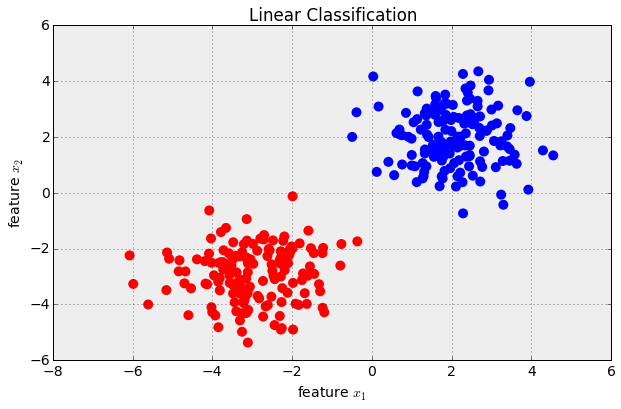

In [228]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),-1*np.ones((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm.svg',format='svg')

In [229]:
print X.shape,Y.shape

(300L, 2L) (300L, 1L)


In [230]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [231]:
print X.shape,Y.shape

(300L, 3L) (300L, 1L)


In [232]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function):
   
    thetas=np.random.rand(X.shape[1],1)
    ad=derivative_cost_function(X,Y,thetas)
    print thetas, ad
    eps= 0.00001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [233]:
#%pdb
svmclass=SVM()

In [234]:
test_derivative(X,Y,svmclass.cost_function,svmclass.derivative_cost_function)

[[ 0.62723103]
 [ 0.65201434]
 [ 0.90706938]] [ 1.25810976  1.22575225  0.        ]
diff in direction [[  2.00000000e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  2.00000000e-05]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  0.00000000e+00]
 [  2.00000000e-05]]
Computational derivatvie = [1.2581097604602576, 1.2257522543412946, 2.2204460492503128e-11]
Analytical derivative = (3L,) [ 1.25810976  1.22575225  0.        ]
Their difference= [ -1.07955866e-11  -5.19904120e-11   2.22044605e-11]


In [235]:
test_derivative(X,Y,svmclass.cost_function,svmclass.derivative_cost_function) # different must be in order of e-11

[[ 0.82467443]
 [ 0.70165745]
 [ 0.53194803]] [ 1.25810976  1.22575225  0.        ]
diff in direction [[  2.00000000e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  2.00000000e-05]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  0.00000000e+00]
 [  2.00000000e-05]]
Computational derivatvie = [1.2581097604602576, 1.2257522543857036, 0.0]
Analytical derivative = (3L,) [ 1.25810976  1.22575225  0.        ]
Their difference= [ -1.07955866e-11  -7.58149099e-12   0.00000000e+00]


In [236]:
svmclass.train(X,Y)

Converged, iterations:  450 !!!
Value of Cost Function (obtained in 451 iterations) at Minimum Points [[-0.45005094]
 [-0.41449431]
 [-0.1373    ]], is 0.00390625991681


Value of Cost Function at Minimum Points [[-0.64981112]
 [-0.71767318]
 [-0.38251667]], is 0.0


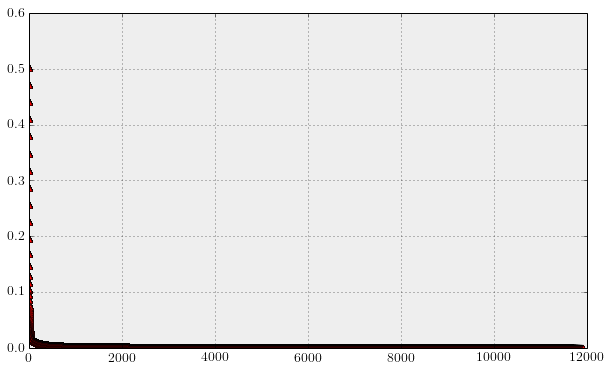

In [59]:
svmclass.train(X,Y) # 

[ 6.26972268] [-5.27023002]


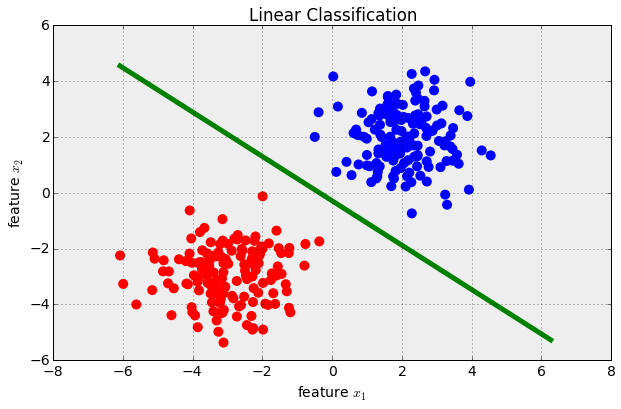

In [237]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-svmclass.theta[2]-svmclass.theta[0]*minx)/svmclass.theta[1]
y2=(-svmclass.theta[2]-svmclass.theta[0]*maxx)/svmclass.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class.svg',format='svg')
#[ 4.97159546] [-4.65164534]

(10000L, 3L)
[1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 

(-5.3678375947281065, 4.3540144301612509)

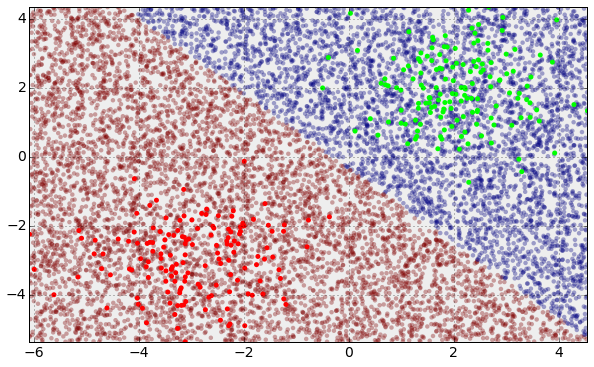

In [238]:
npts=10000
model=svmclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])
#(-5.3678375947281065, 4.3540144301612509)